## FINANCIAL INCLUSION IN AFRICA: PREDICTING WHO IN AFRICA IS MOST LIKELY TO HAVE A BANK ACCOUNT

The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

A survey was conducted and various information were collected from over 20,000 individuaks from four (4) countries across Africa including Uganda, Rwanda, Kenya and Tanzania. The information relates to features that indicates whether an individual is likely to own a bank account or not.

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import category_encoders as ce
sb.set()

# Loading the data and making a copy of it to preserve the original data

In [3]:
fin_inc_data= pd.read_csv('Train.csv')
fin_inc_eval= pd.read_csv('Test.csv')

data= fin_inc_data.copy()
test_set= fin_inc_eval.copy()

data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
test_set.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


# checking the shape of the data

In [5]:
data.shape

(23524, 13)

The data consists of 23,524 observations and 13 features. The features include information as follows:

1	country	- Country interviewee is in.

2	year - Year survey was done in.

3	uniqueid - Unique identifier for each interviewee

4	location_type - Type of location: Rural, Urban

5	cellphone_access - If interviewee has access to a cellphone: Yes, No

6	household_size - Number of people living in one house

7	age_of_respondent - The age of the interviewee

8	gender_of_respondent - Gender of interviewee: Male, Female

9	relationship_with_head - The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know

10	marital_status - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know

11	education_level - Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA

12	job_type - Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer

# checking the information of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The information of the dataset shows that there are no missing values. There are 3 int/number and 10 object datatype. 

# confrming that there are no missing values in the data

In [7]:
data.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

# checking for duplicated observations

In [8]:
data.duplicated().sum()

0

there are no duplicate observations in the dataset

# checking for the distribution of features using the histogram plot

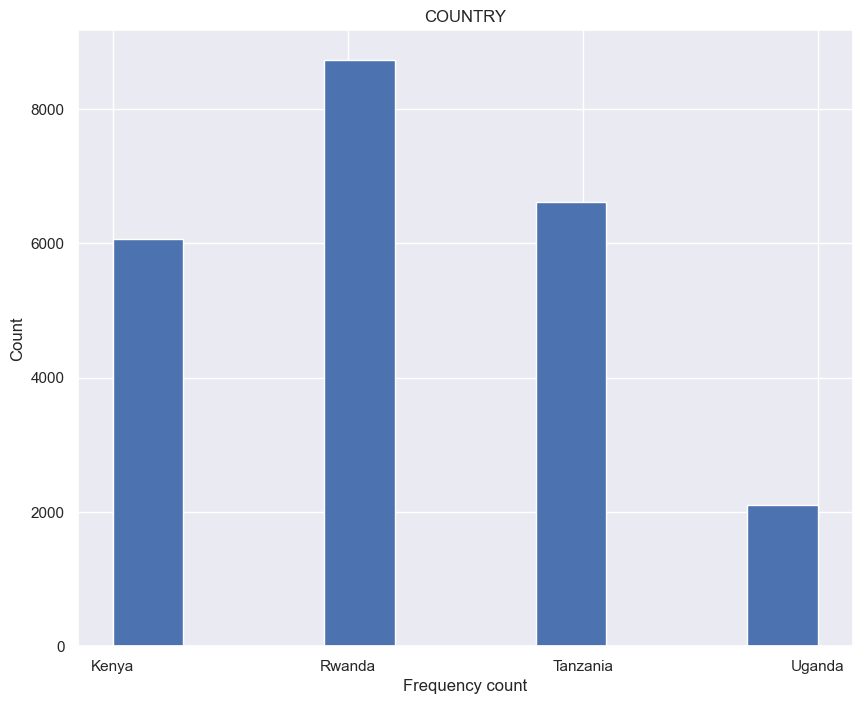

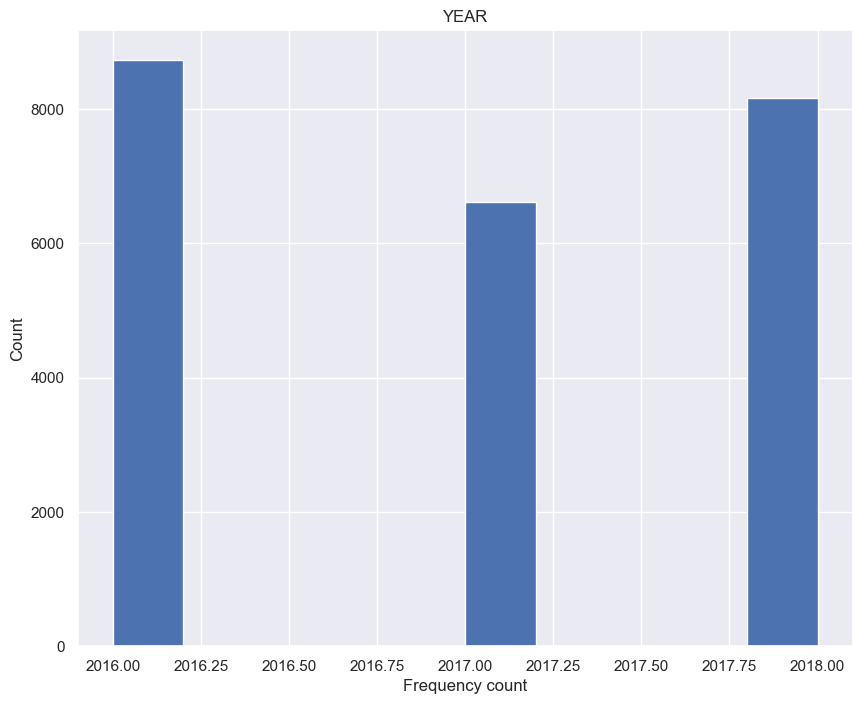

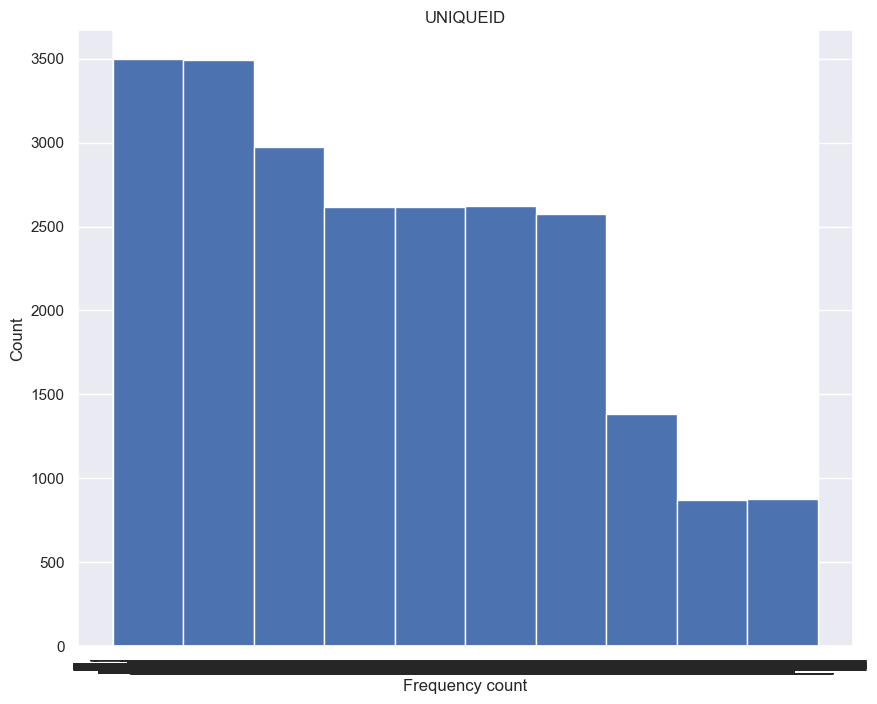

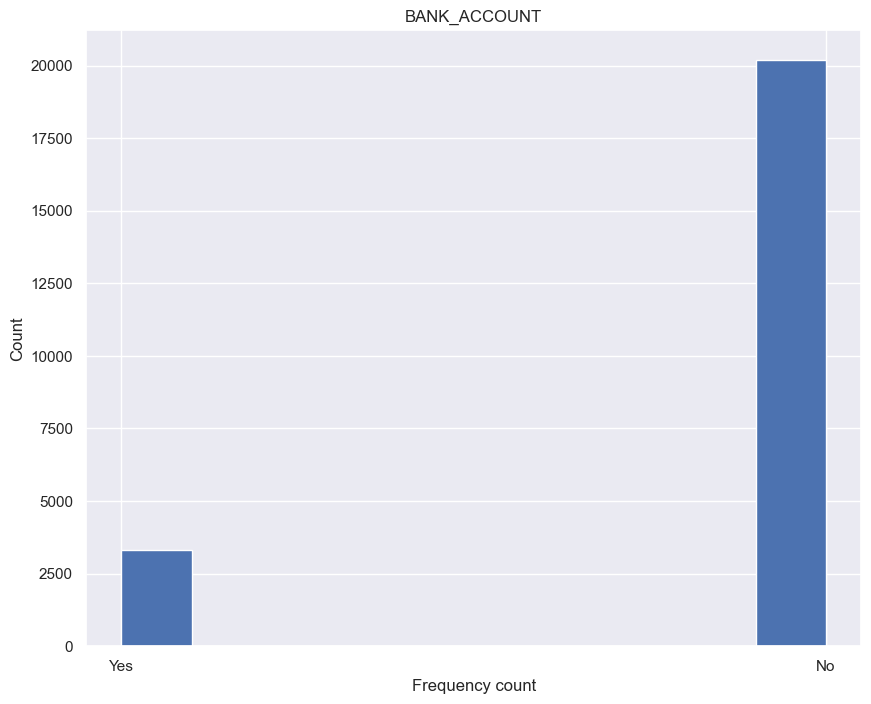

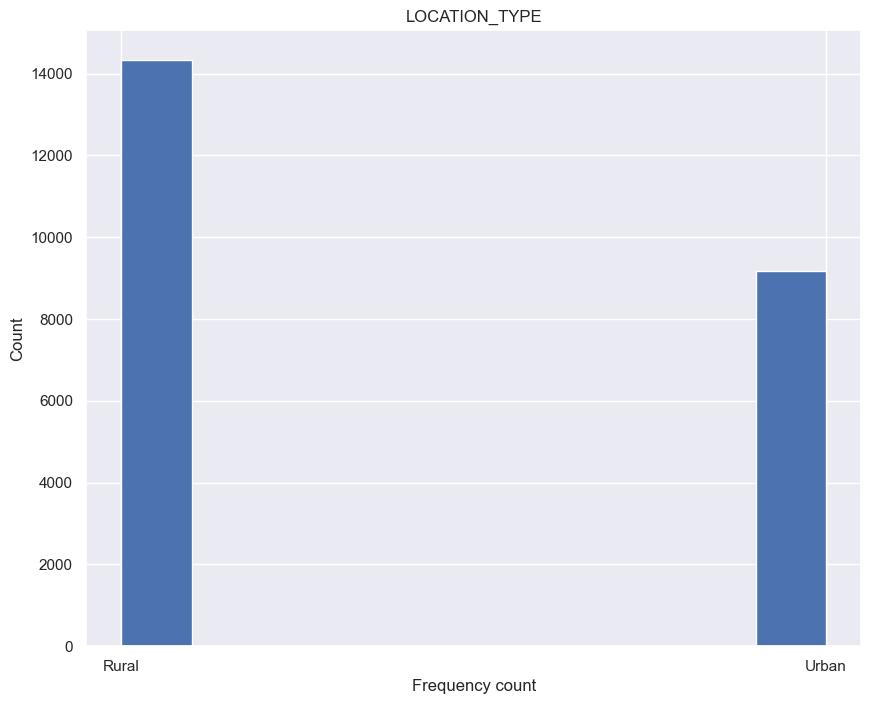

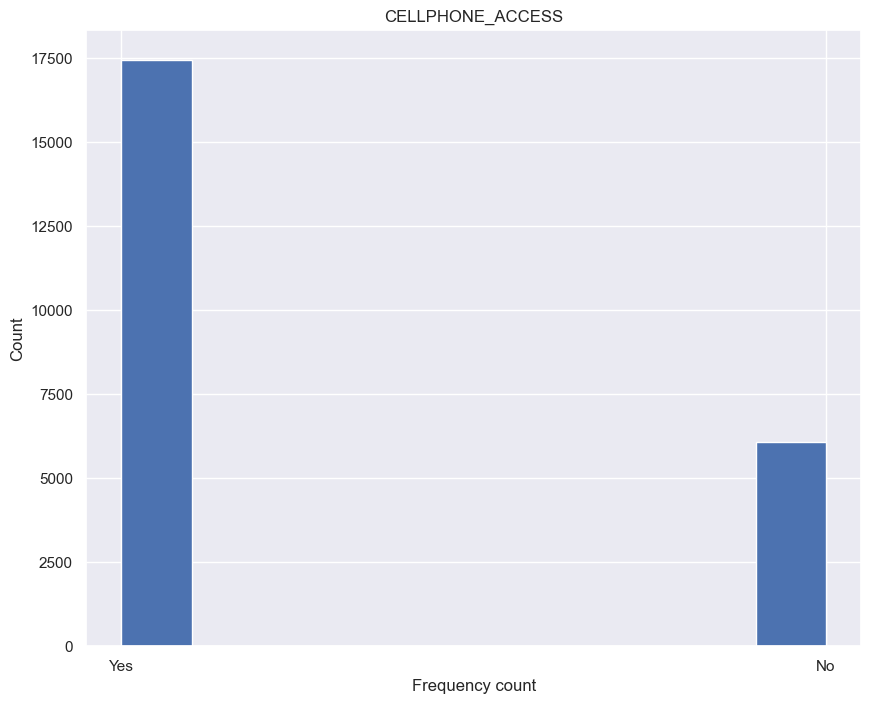

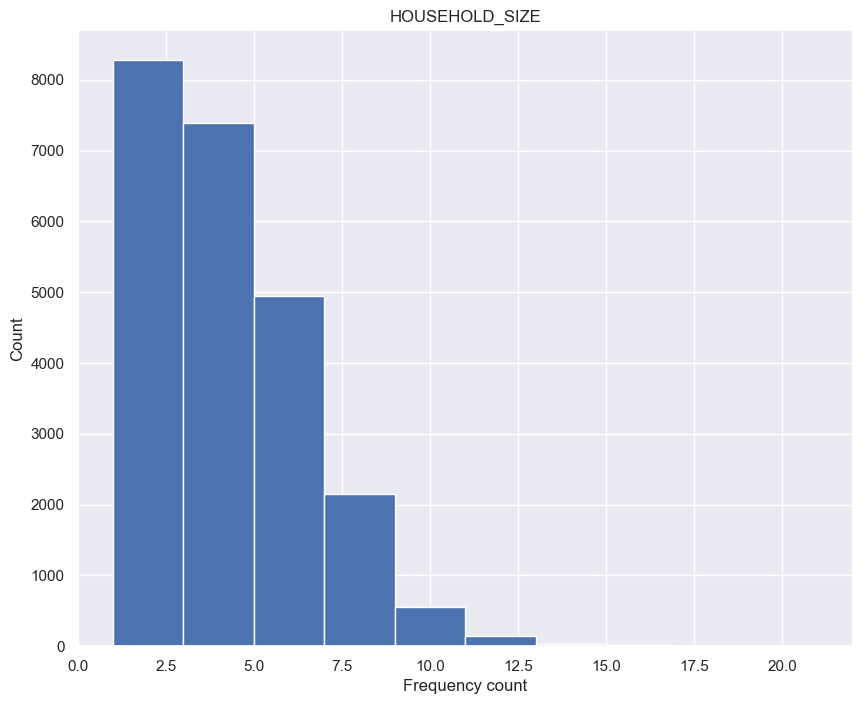

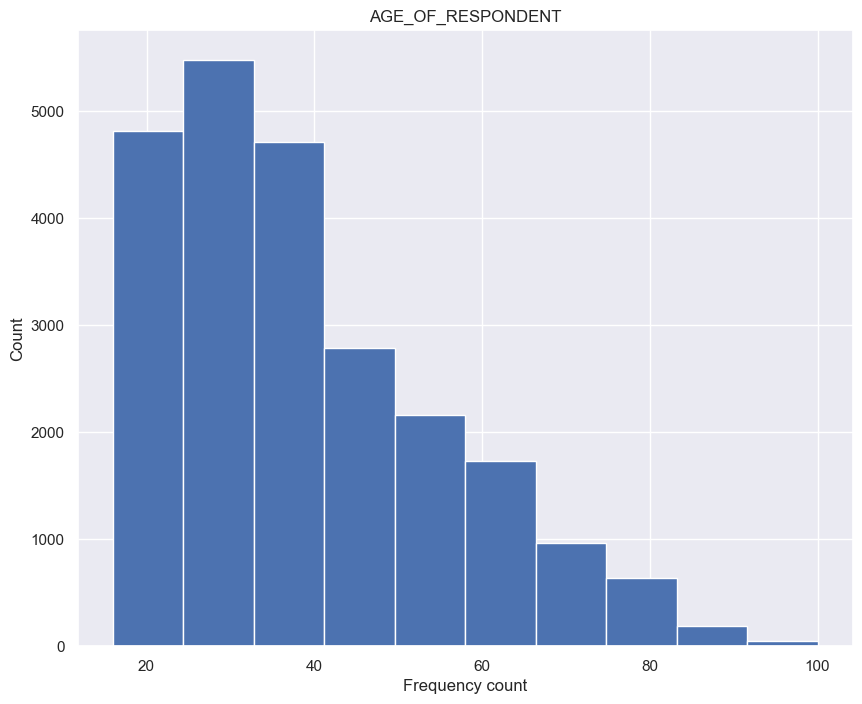

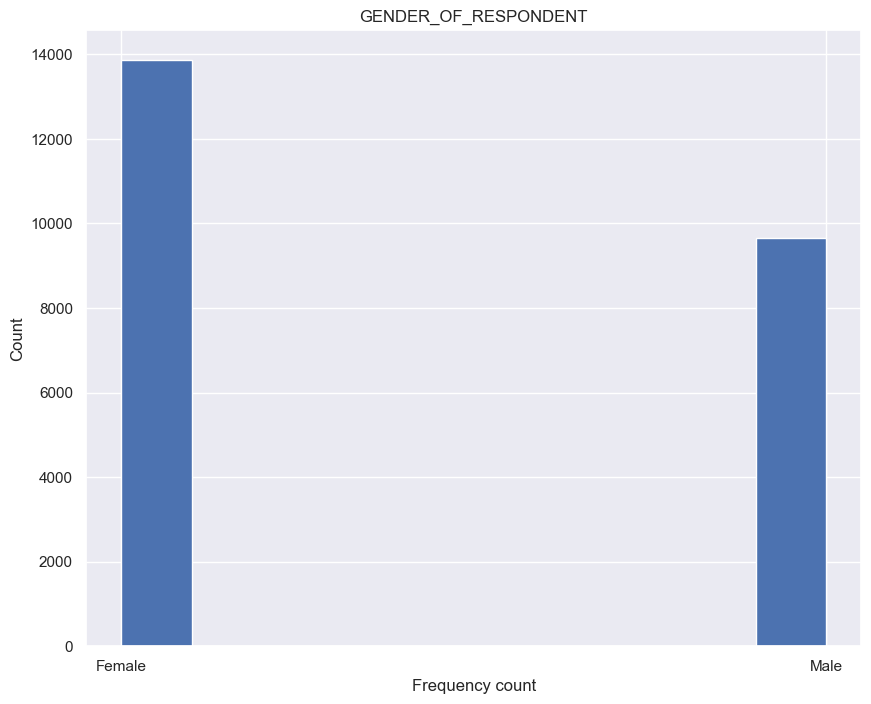

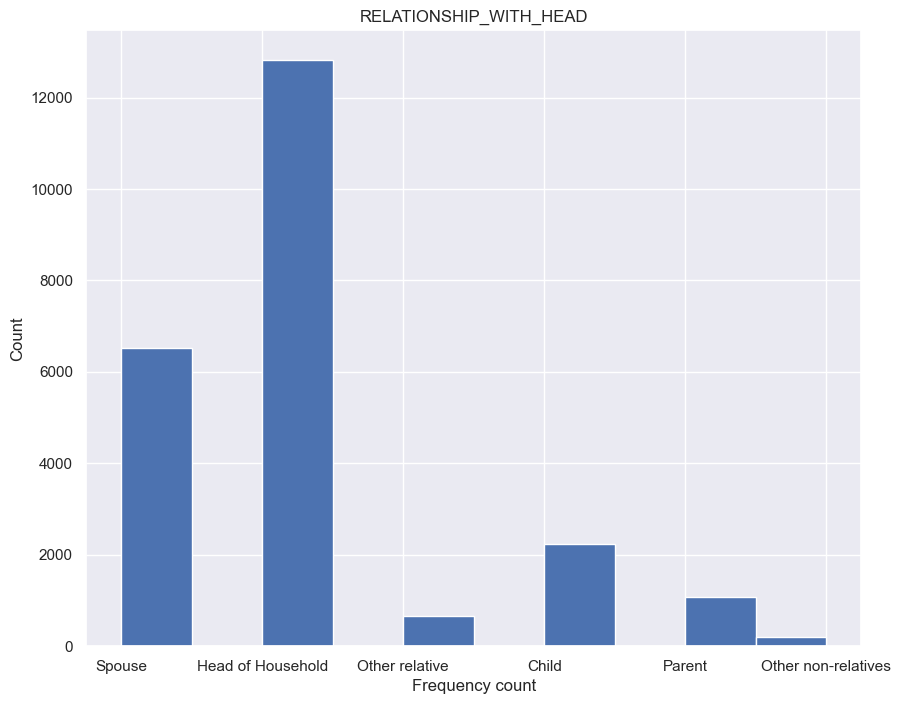

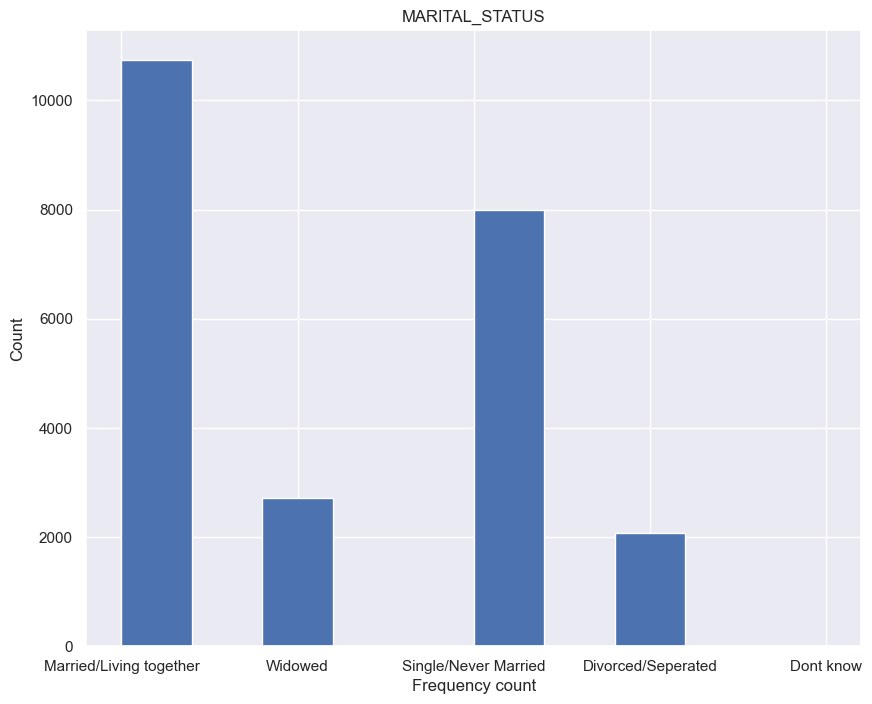

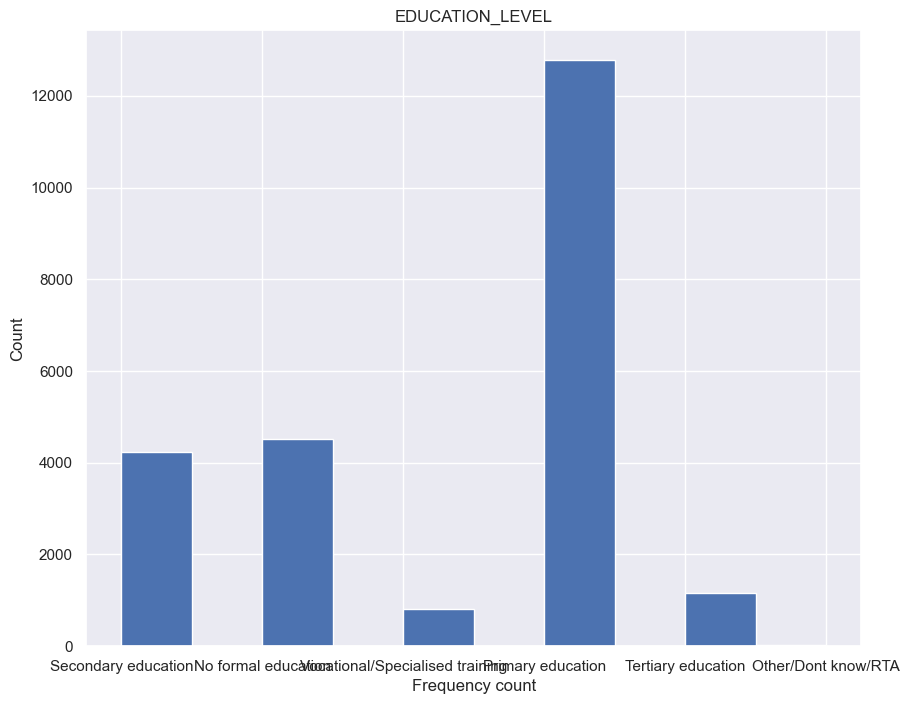

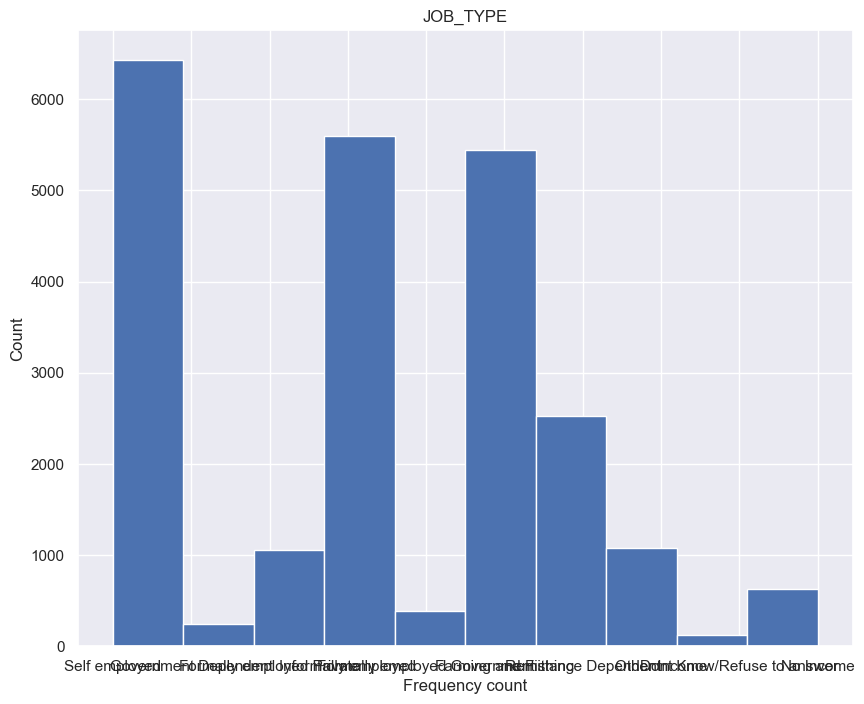

In [9]:
for col in data.columns:
    plt.figure(figsize=(10,6))
    data[col].hist(figsize=(10, 8))
    plt.title(col.upper())
    plt.ylabel('Count')
    plt.xlabel('Frequency count')
    plt.show()

1. Rwanda has the highest count of interviewees with over 9k interviwees, with about 7k interviewees, Kenya with over 6k interviewees and Uganda with over 2k interviewees

2. The highest number of survey collected was in 2016 with over 9k individuals interviewed, followed by 2018 with less than 9k individuals interviewed and 2017 with less than 7k individuals interviewed

3. From the individuals interviewed, over 20k did not have a bank account and just about 3k individuals had a bank account. This shows that the level of financial inclusion in these countries is very low

4.  There are over 14k interviewees from Rural areas and over 9k interviewees from urban areas

5.  There are 17k interviewees with cellphone access and over 6k interviewees with cellphone access

6.  Most interviewees have 2-10 members in their households, with a fewr interviewees having 11-20 members in their household

7.  the majority of the respondents are concentrated towards the lower end of the age range, with a smaller proportion falling into the higher age brackets. Most interviewees are between the age of 18 to 40

8.  There are about 14k female interviewees and 10k male interviewees

9.  13k interviewees are head of households, over 6k are spouses and over 2k are children

10.  11k interviewees are married and living together, 8k are single and never married, about 3k widowed, 2k divorced/separated,

11.  13k interviewees are have the primary education as their highest education, over 4k with no formal education, 4k with secondary education, 1k with tertiary education and less than 1k with specialized training

12.  Over 6k interviewees were self employed, over 5k informally employed, over 5k are into farming and fishing, over 2k are remittance dependent, 1k rely on other income, 1k are formally employed by the government and 247 government dependent

# Checking the distribution and outliers using boxplots

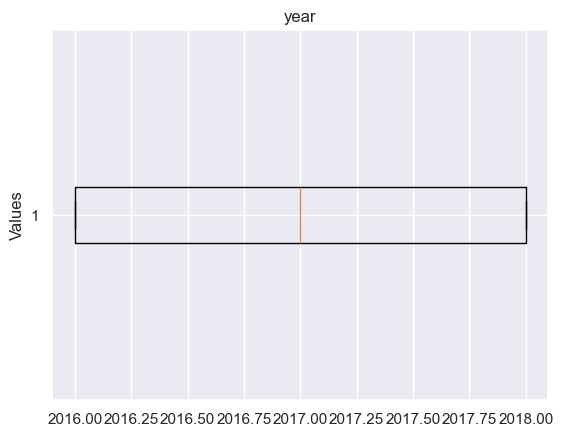

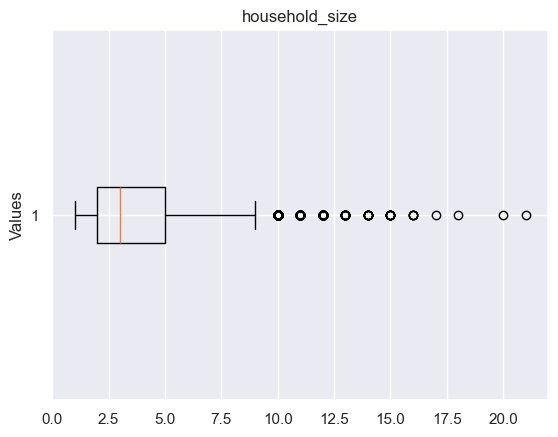

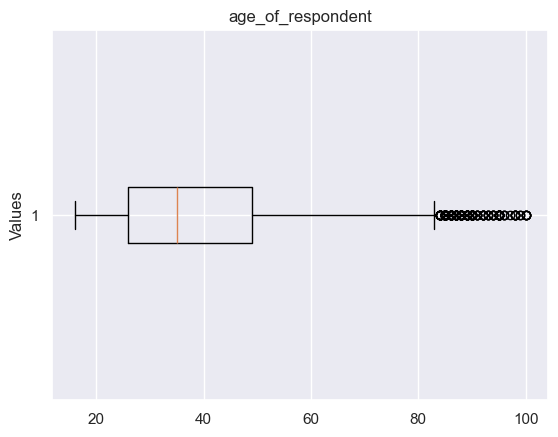

In [10]:
for col in data.select_dtypes(include='number').columns:
    plt.boxplot(data[col], vert= False)
    plt.title(col)
    plt.ylabel('Values')
    plt.show()

# Analyzing the outliers using the interquartile range

In [11]:
for col in data.select_dtypes(include='number').columns:
    q3, q1 = np.percentile(data[col], [75,25])
    iqr = q3 - q1
    upper_lim = q3 + 1.5 * iqr
    lower_lim = q1 - 1.5 * iqr
    
    total_outliers = len(data.loc[data[col] > upper_lim]) + len(data.loc[data[col] < lower_lim])
    percent_outliers = (total_outliers/len(data))*100

    print('column:', col)
    print('upper limit:', upper_lim)
    print('lower limit:', lower_lim)
    print('total outliers:', total_outliers)
    print('percent outliers:', percent_outliers)
    print('---------------------------')
    print(' ')

column: year
upper limit: 2021.0
lower limit: 2013.0
total outliers: 0
percent outliers: 0.0
---------------------------
 
column: household_size
upper limit: 9.5
lower limit: -2.5
total outliers: 381
percent outliers: 1.619622513178031
---------------------------
 
column: age_of_respondent
upper limit: 83.5
lower limit: -8.5
total outliers: 241
percent outliers: 1.02448563169529
---------------------------
 


# Checking the descriptive statistics for numerical features

In [12]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [13]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking the distribution of individuals with and without a bank account in each country

In [14]:
bank_account_perc= data.groupby(['country', 'bank_account']).size().unstack()
bank_account_perc

bank_account,No,Yes
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


# Checking the Percentage of individuals with and without a bank account in each country

In [15]:
perc= bank_account_perc.div(bank_account_perc.sum(axis= 1), axis= 0)*100
perc

bank_account,No,Yes
country,,
Kenya,74.934080,25.065920
Rwanda,88.517459,11.482541
Tanzania,90.830816,9.169184
Uganda,91.385055,8.614945


Kenya has the highest number of respondents with a bank account with a total count of 1521 or 25%

1,003 or 11% of respondents in Rwanda have a bank account

607 or 9% of respondents in Tanzania have a bank account

Uganda has the lowest number of respondents with a bank account with 181 or 8% percent count


# Hypothesis Test

To determine if there is a significant relationship between bank account ownership and education level, job type, and household size

The null and alternate hypothesis are stated as follows;

 1. Education Level
  - H0: There is no association between education level and bank account ownership.
  - H1: There is an association between education level and bank account ownership.

 2. Job Type
  - H0: There is no association between job type and bank account ownership.
  - H1: There is an association between job type and bank account ownership.

 3. Household Size
  - H0: There is no association between household size and bank account ownership.
  - H1: There is an association between household size and bank account ownership.


In [16]:
from scipy.stats import chi2_contingency

edu_level_table = pd.crosstab(data['bank_account'], data['education_level'])

chi_2, p_value, degree_of_freedom, expected_freq = chi2_contingency(edu_level_table)

sig_level= 0.05

print('chi-square:', chi_2, ' ', 'p_value:', p_value, 'significance level:', sig_level)

chi-square: 3549.125449633797   p_value: 0.0 significance level: 0.05


In [17]:
from scipy.stats import ttest_ind

bank_acc_yes = data[data['bank_account'] == 'Yes']['household_size']
bank_acc_no = data[data['bank_account'] == 'No']['household_size']

t_stat, p_value = ttest_ind(bank_acc_yes, bank_acc_no)

print('t-statistics:', t_stat, ' ', 'p_value:', p_value.round(3), 'significance level:', sig_level)

t-statistics: -4.346141993128878   p_value: 0.0 significance level: 0.05


In [18]:
job_type_table = pd.crosstab(data['bank_account'], data['job_type'])

chi_2, p_value, degree_of_freedom, expected_freq = chi2_contingency(job_type_table)

sig_level= 0.05

print('chi-square:', chi_2, ' ', 'p_value:', p_value, 'significance level:', sig_level)

chi-square: 3032.2542274081948   p_value: 0.0 significance level: 0.05


Since the p-value (0.0) is less than the significance level (0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in bank account ownership and education level, job type, and household size

# checking the value counts of all features

In [19]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts())
    print('-'*20)

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64
--------------------
uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64
--------------------
bank_account
No     20212
Yes     3312
Name: count, dtype: int64
--------------------
location_type
Rural    14343
Urban     9181
Name: count, dtype: int64
--------------------
cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64
--------------------
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64
--------------------
relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64
--------

The Unique_id feature will be dropped as it is not relevant in predicting wether an individual is likely to have a bank account or not. It only srves as a unique identifier for each respondent of the survey

# dropping the unique_id feature

In [20]:
data= data.drop(columns='uniqueid')
test_set= test_set.drop(columns='uniqueid')
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [21]:
test_set.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In order to confirm wether there is a relationship between the features, the categorical features will be encoded and the pearson's correlation will be used

In [22]:
analysis= data.copy()

In [23]:
analysis.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [24]:
nom_cat= ['country', 'bank_account', 'location_type', 'cellphone_access',
        'gender_of_respondent','relationship_with_head', 'marital_status', 'education_level', 'job_type']

coder= ce.OneHotEncoder(cols=nom_cat, handle_unknown= 'return_nan', return_df= True, use_cat_names= True)

coded = coder.fit_transform(analysis[nom_cat])

In [25]:
analysis= analysis.drop(columns=nom_cat)

analysis= pd.concat([analysis, coded], axis=1)

In [26]:
analysis.head()

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,bank_account_Yes,bank_account_No,location_type_Rural,...,job_type_Self employed,job_type_Government Dependent,job_type_Formally employed Private,job_type_Informally employed,job_type_Formally employed Government,job_type_Farming and Fishing,job_type_Remittance Dependent,job_type_Other Income,job_type_Dont Know/Refuse to answer,job_type_No Income
0,2018,3,24,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,5,70,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,5,26,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,5,34,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,8,26,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Correlarion Analysis

In [27]:
data_corr = analysis.corr()
data_corr.head()

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,bank_account_Yes,bank_account_No,location_type_Rural,...,job_type_Self employed,job_type_Government Dependent,job_type_Formally employed Private,job_type_Informally employed,job_type_Formally employed Government,job_type_Farming and Fishing,job_type_Remittance Dependent,job_type_Other Income,job_type_Dont Know/Refuse to answer,job_type_No Income
year,1.000000,-0.052264,-0.019330,0.712544,-0.885158,0.017770,0.378473,0.112318,-0.112318,-0.214621,...,0.180932,-0.006426,0.094141,-0.156028,0.056126,-0.248909,0.095070,0.101870,0.011706,0.081631
household_size,-0.052264,1.000000,-0.129729,0.050243,0.235996,-0.408641,0.167451,-0.028326,0.028326,0.257284,...,-0.150520,-0.044929,-0.069462,0.007999,-0.003995,0.163738,0.014530,0.054045,0.020790,-0.019907
age_of_respondent,-0.019330,-0.129729,1.000000,0.028948,0.022690,-0.012334,-0.063400,0.019429,-0.019429,0.047373,...,0.000097,0.171390,-0.061983,-0.089447,-0.005859,0.154106,-0.057238,-0.014614,-0.002836,-0.061105
country_Kenya,0.712544,0.050243,0.028948,1.000000,-0.453119,-0.368965,-0.184639,0.186242,-0.186242,-0.031225,...,-0.153959,0.001226,0.067538,-0.005646,0.122348,0.047353,0.168241,-0.057839,-0.039272,-0.097565
country_Rwanda,-0.885158,0.235996,0.022690,-0.453119,1.000000,-0.480946,-0.240677,-0.057378,0.057378,0.389062,...,-0.352309,-0.000619,-0.098090,0.165238,-0.011552,0.378012,-0.078517,-0.032802,0.011106,-0.127176


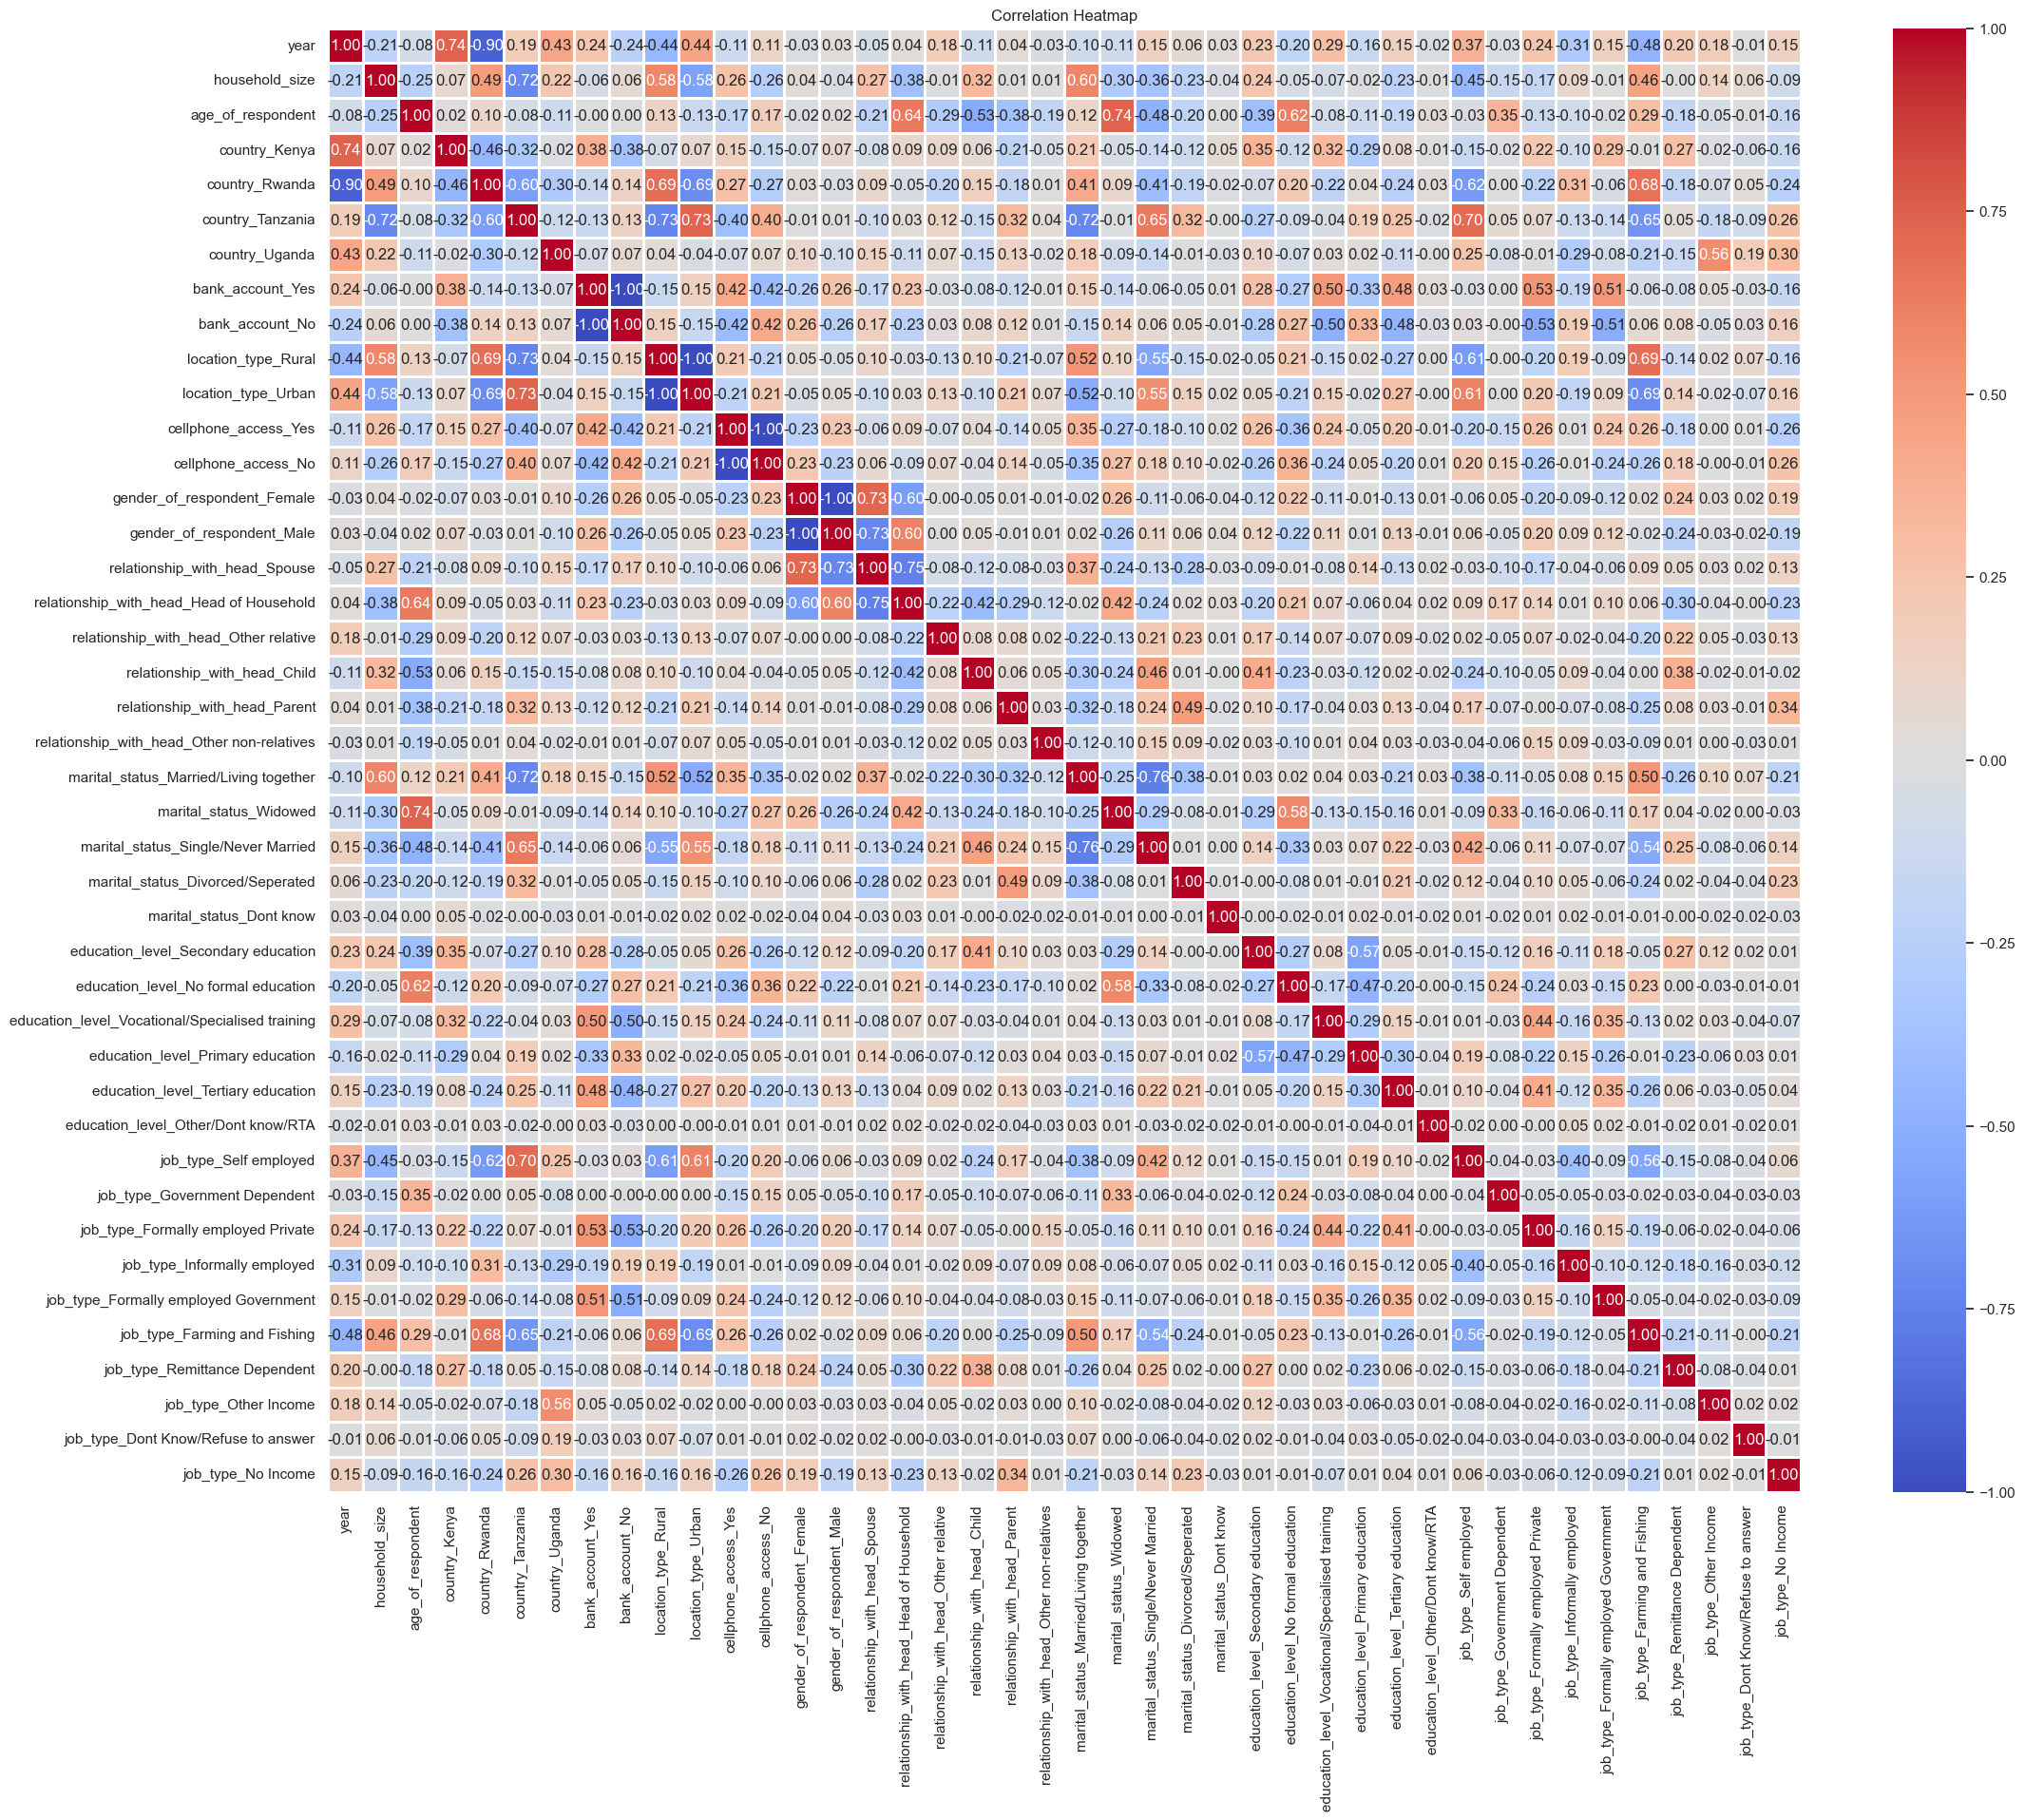

In [28]:
plt.figure(figsize=(25, 20))
sb.heatmap(data_corr.corr(),
			cmap = 'coolwarm',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
plt.title('Correlation Heatmap')
plt.show()

We can deduce the following observations from the heatmap;

1. Having a bank account is significantly positively correlated with being from Kenya; on the other hand, there is a negative correlation with this attribute in Rwanda, Tanzania, and Uganda

2. respondents who live in urban areas have a bank account compared to those who live in rural areas

3. having access to a mobile is positively correlated with having a bank account

4. being married or cohabitating is positively correlated with having a bank account, whereas being widowed or single/never married is negatively correlated with bank account ownership

5. There appears to be a very slight positive correlation between being female and having a bank account. This Could be due to the imbalance of the count of respondents as female respondents outnumber the male respondents

Insights

1. The different relationships between country and bank account ownership imply that cultural norms, financial infrastructure, and economic growth are some of the country-specific elements that may affect access to financial services. This is probably due to the fact that Kenya has a more developed economy, a stronger financial system, policies that encourage financial inclusion like laws governing mobile money and financial literacy initiatives, and a more urbanised population than Rwanda, Tanzania, and Uganda, all of which have previously seen periods of political unrest and conflict.

2. The relevance of geographic accessibility to financial institutions is highlighted by the substantial link found between bank account ownership and location type (rural vs. urban).

3. The positive correlation between cellphone access and bank account ownership suggests that mobile banking and digital financial services play a crucial role in increasing financial inclusion.

4. The fact that bank account ownership and mobile access are positively correlated indicates that digital financial services and mobile banking are essential for promoting financial inclusion.

5. The relevance of income and employment status in obtaining financial services is underscored by the different relationships between job type and bank account ownership, with greater rates of bank account ownership appearing to be linked to formal employment in the private sector and self-employment.

It is crucial to remember that these associations may not always indicate causality. The determination of Financial Inclusion may be influenced by additional factors. However, this report provides background information and thorough views on financial inclusion in Africa, with focus on Kenya, Rwanda, Tanzania, and Uganda.

In [29]:
data.select_dtypes('number').describe() 

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


The numerical features are having different scales. They will be normalized in order to ensure that the model converges faster, to prevent features with a large scale from dominating the the learning process, and enable the model to generalize better to unseen data, reducing overfitting.

In [30]:
data_coded= data.copy()

# Splitting the data into train and validation set

In [31]:
from sklearn.model_selection import train_test_split

X =  data_coded.drop(columns= 'bank_account')
y = data_coded['bank_account']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, 
                                                  test_size = 0.1, random_state=7)


In [32]:
split_data= [X_train, X_val, y_train, y_val]

for df in split_data:
    df.reset_index(drop= True, inplace= True)

# Encoding the target variable

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

encoder.fit(y_train)

y_train_coded= encoder.transform(y_train)
y_val_coded= encoder.transform(y_val)

y_train= pd.Series(y_train_coded)
y_val= pd.Series(y_val_coded)

In [34]:
X_train.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

# Encoding Categorical features

In [35]:
le= LabelEncoder()

le.fit(X_train["location_type"])
X_train["location_type"] = le.transform(X_train["location_type"])
X_val["location_type"] = le.transform(X_val["location_type"])
test_set["location_type"] = le.transform(test_set["location_type"])

In [36]:
le.fit(X_train["cellphone_access"])
X_train["cellphone_access"] = le.transform(X_train["cellphone_access"])
X_val["cellphone_access"] = le.transform(X_val["cellphone_access"])
test_set["cellphone_access"] = le.transform(test_set["cellphone_access"])

In [37]:
le.fit(X_train["gender_of_respondent"])
X_train["gender_of_respondent"] = le.transform(X_train["gender_of_respondent"])
X_val["gender_of_respondent"] = le.transform(X_val["gender_of_respondent"])
test_set["gender_of_respondent"] = le.transform(test_set["gender_of_respondent"])

In [38]:
nom_cat= ['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

coder= ce.OneHotEncoder(cols=nom_cat, handle_unknown= 'return_nan', return_df= True, use_cat_names= True)

coder.fit(X_train[nom_cat])

X_train_coded= coder.transform(X_train[nom_cat])
X_val_coded= coder.transform(X_val[nom_cat])
test_coded= coder.transform(test_set[nom_cat])

In [39]:
X_train= X_train.drop(columns=nom_cat)
X_val= X_val.drop(columns=nom_cat)
test_set= test_set.drop(columns=nom_cat)

X_train= pd.concat([X_train, X_train_coded], axis=1)
X_val= pd.concat([X_val, X_val_coded], axis=1)
test_set= pd.concat([test_set, test_coded], axis=1)

# Normalizing numerical Features

In [40]:
from sklearn.preprocessing import Normalizer

num_cols= ['year', 'household_size', 'age_of_respondent']

scaler= Normalizer()

scaler.fit(X_train[num_cols])

X_train[num_cols]= scaler.transform(X_train[num_cols])
X_val[num_cols]= scaler.transform(X_val[num_cols])
test_set[num_cols]= scaler.transform(test_set[num_cols])

# TRAINING THE MODEL WITH ALL FEATURES

In [41]:
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = LGBMClassifier()

kfold = RepeatedStratifiedKFold(n_splits = 10,
                                n_repeats= 3,
                                random_state= 7)

models= [model1,
         model2,
         model3
         ]

scores= []

for model in models:
    score = cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv= 10) 
    scores.append(score.mean())

print('decision tree score:',1- scores[0])
print('random forest score:',1- scores[1])
print('lightgbm:',1- scores[2])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2682, number of negative: 16371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 19053, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140765 -> initscore=-1.808949
[LightGBM] [Info] Start training from score -1.808949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2683, number of negative: 16371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

In [42]:
scores

[0.8360961201265177, 0.869538289569174, 0.8879123673058112]

In [43]:
from sklearn.metrics import accuracy_score

seed = 7
fold = 10

model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = model = LGBMClassifier()


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

yhat1= model1.predict(X_train)
yhat2= model2.predict(X_train)
yhat3= model3.predict(X_train)

acc_score1= accuracy_score(y_train, yhat1)
acc_score2= accuracy_score(y_train, yhat2)
acc_score3= accuracy_score(y_train, yhat3)

print('decision tree accuracy:',1- acc_score1)
print('random forest accuracy:',1- acc_score2)
print('lightgbm:',1- acc_score3)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2981, number of negative: 18190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 21171, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140806 -> initscore=-1.808613
[LightGBM] [Info] Start training from score -1.808613
decision tree accuracy: 0.020972084455150863
random forest accuracy: 0.020972084455150863
lightgbm: 0.09659439799726044


# EVALUATION

In [45]:
score = cross_val_score(model3, X_val, y_val, scoring= 'accuracy', cv= 10) 

print('lgbm:',1- score.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 298, number of negative: 1819
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 2117, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140765 -> initscore=-1.808949
[LightGBM] [Info] Start training from score -1.808949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 298, number of negative: 1819
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 2117, number of used features:

In [46]:
y_pred= model3.predict(X_val)

score= accuracy_score(y_val, y_pred)

print('lgbm:',1- score)

lgbm: 0.11092222694432641


In [47]:
importance = model3.feature_importances_

feat_imp= []
feature = []
importance_score= []
for feat, imp in zip(X_train.columns, importance):
    feature.append(feat)
    importance_score.append(imp)
    score_list= [feat, imp]
    feat_imp.append(score_list)
imp_score= pd.DataFrame(feat_imp, columns=['features', 'score']).sort_values(by= 'score',ascending= False).round(2)

In [48]:
imp_score

,features,score
3,household_size,561
0,year,486
4,age_of_respondent,465
1,location_type,147
5,gender_of_respondent,97
7,country_Kenya,83
6,country_Tanzania,68
21,education_level_Primary education,63
29,job_type_Informally employed,61
2,cellphone_access,60


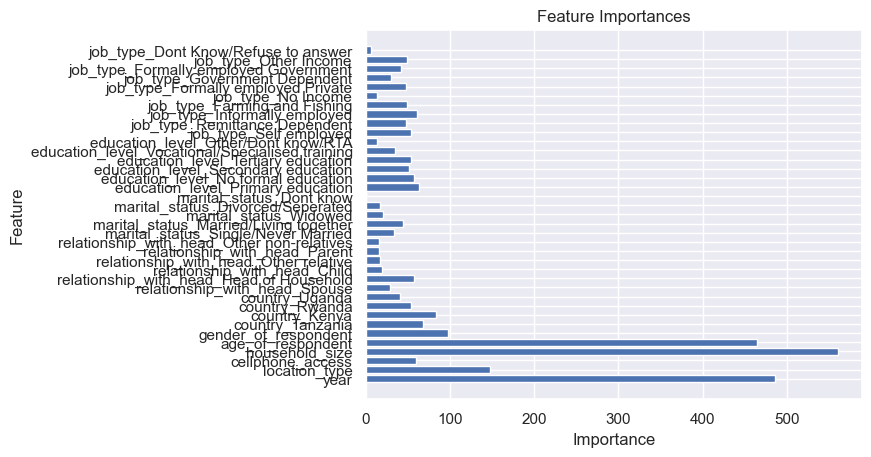

In [49]:
plt.barh(feature, importance_score)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on our model, the Principal Forces Behind Financial Inclusion include:

The most significant characteristic is household size (score: 561). Compared to smaller homes, larger households may have distinct financial requirements and habits. It can suggest that larger households require more financial services or encounter more challenges.


Year (score: 486): Another important factor is the survey or data collection year. This implies that financial inclusion evolves dramatically over time, most likely as a result of legislative changes, technical breakthroughs, or macroeconomic circumstances.

Respondent's age (score: 465): One important element is age, which suggests that various age groups have different levels of financial inclusion. Compared to those in the middle, younger or older people may have distinct financial demands and access.

Factors related to demographics:

Respondent's gender (score: 97): Gender is a factor, although it is not as important as age, year, and household size. This raises the possibility of gender differences in financial inclusion.
Location Type (score: 147): Living in an urban or rural area has an impact on people's access to financial services and infrastructure.
Social and Economic Aspects:

Education Level (scores 51–63): Education is a significant component, and the influence of education varies depending on the level. In general, greater financial inclusion is linked to higher levels of education.
Job Type: Financial inclusion is greatly impacted by the type of employment (scores range from 49 to 61). Compared to individuals who work informally or in other income categories, people in formal employment probably have better access to financial services.

Geographic factors

Country (scores range from 53 to 83): The respondent's home country is significant, suggesting that varied economic environments, legal systems, and cultural norms influence the degree of financial inclusion in various nations.

In [51]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_val, y_pred)
confusion_mat

array([[1967,   55],
       [ 206,  125]], dtype=int64)

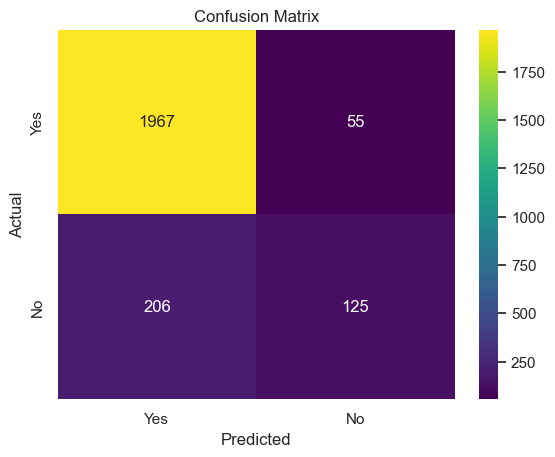

In [54]:
sb.heatmap(confusion_mat,
           annot=True, 
           fmt= 'd', 
           cmap="viridis", 
           xticklabels=["Yes", "No"], 
           yticklabels=["Yes", "No"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

High True Positives: The model does a good job of accurately recognising "Yes" (financially included) responses.
    
Minimal False Positives: The model rarely predicts "Yes" when the real response is "No."

Moderate False Negatives: A significant part of the "Yes" cases are missed by the model, as evidenced by the high number of false negatives.


# SUMMARY AND FINDINGS

From the individuals interviewed, over 20k did not have a bank account and just about 3k individuals had a bank account. This shows that the level of financial inclusion in these countries is very low

There are 17k interviewees with cellphone access and over 6k interviewees with cellphone access

13k interviewees are have the primary education as their highest education, over 4k with no formal education, 4k with secondary education, 1k with tertiary education and less than 1k with specialized training

There is a statistically significant difference in bank account ownership and education level, job type, and household size


Having a bank account is significantly positively correlated with being from Kenya; on the other hand, there is a negative correlation with this attribute in Rwanda, Tanzania, and Uganda

Respondents who live in urban areas have a bank account compared to those who live in rural areas

Having access to a mobile is positively correlated with having a bank account

Being married or cohabitating is positively correlated with having a bank account, whereas being widowed or single/never married is negatively correlated with bank account ownership

There appears to be a very slight positive correlation between being female and having a bank account. This Could be due to the imbalance of the count of respondents as female respondents outnumber the male respondents

# INSIGHTS

The different relationships between country and bank account ownership imply that cultural norms, financial infrastructure, and economic growth are some of the country-specific elements that may affect access to financial services. This is probably due to the fact that Kenya has a more developed economy, a stronger financial system, policies that encourage financial inclusion like laws governing mobile money and financial literacy initiatives, and a more urbanised population than Rwanda, Tanzania, and Uganda, all of which have previously seen periods of political unrest and conflict.

The relevance of geographic accessibility to financial institutions is highlighted by the substantial link found between bank account ownership and location type (rural vs. urban).

The positive correlation between cellphone access and bank account ownership suggests that mobile banking and digital financial services play a crucial role in increasing financial inclusion.

The fact that bank account ownership and mobile access are positively correlated indicates that digital financial services and mobile banking are essential for promoting financial inclusion.

The relevance of income and employment status in obtaining financial services is underscored by the different relationships between job type and bank account ownership, with greater rates of bank account ownership appearing to be linked to formal employment in the private sector and self-employment.

It is crucial to remember that these associations may not always indicate causality. The determination of Financial Inclusion may be influenced by additional factors. However, this report provides background information and thorough views on financial inclusion in Africa, with focus on Kenya, Rwanda, Tanzania, and Uganda.

# MODEL INTERPRETATION

Based on our model, the Principal Forces Behind Financial Inclusion include:

The most significant characteristic is household size (score: 561). Compared to smaller homes, larger households may have distinct financial requirements and habits. It can suggest that larger households require more financial services or encounter more challenges.


Year (score: 486): Another important factor is the survey or data collection year. This implies that financial inclusion evolves dramatically over time, most likely as a result of legislative changes, technical breakthroughs, or macroeconomic circumstances.

Respondent's age (score: 465): One important element is age, which suggests that various age groups have different levels of financial inclusion. Compared to those in the middle, younger or older people may have distinct financial demands and access.

Factors related to demographics:

Respondent's gender (score: 97): Gender is a factor, although it is not as important as age, year, and household size. This raises the possibility of gender differences in financial inclusion.
Location Type (score: 147): Living in an urban or rural area has an impact on people's access to financial services and infrastructure.
Social and Economic Aspects:

Education Level (scores 51–63): Education is a significant component, and the influence of education varies depending on the level. In general, greater financial inclusion is linked to higher levels of education.
Job Type: Financial inclusion is greatly impacted by the type of employment (scores range from 49 to 61). Compared to individuals who work informally or in other income categories, people in formal employment probably have better access to financial services.

Geographic factors

Country (scores range from 53 to 83): The respondent's home country is significant, suggesting that varied economic environments, legal systems, and cultural norms influence the degree of financial inclusion in various nations.

# MODEL PERFORMANCE

High True Positives: The model does a good job of accurately recognising "Yes" (financially included) responses.
    
Minimal False Positives: The model rarely predicts "Yes" when the real response is "No."

Moderate False Negatives: A significant part of the "Yes" cases are missed by the model, as evidenced by the high number of false negatives.


# TESTING

In [ ]:
fin_inc_eval['bank_account']= model3.predict(test_set)

In [ ]:
fin_inc_eval

In [ ]:
submission = pd.DataFrame({"uniqueid": fin_inc_eval["uniqueid"] + " x " + fin_inc_eval["country"],
                           "bank_account": fin_inc_eval.bank_account})

In [ ]:
submission

In [ ]:
submission.sample(5)

In [ ]:
pd.read_csv('SampleSubmission.csv')

In [ ]:
submission.to_csv('first_submission.csv', index = False)